<a href="https://colab.research.google.com/github/jgarnicaa/FakeNews/blob/main/FakeNewsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1Md0grlXXV4fB0bkYuMWzBiS64RvjaFGX" alt = "Encabezado MLDS" width = "100%">  </img>

In [ ]:
!pip install unidecode
!pip install pyicu
!pip install pycld2
!pip install morfessor
!pip install polyglot

!pip install --upgrade transformers
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.14-cp310-cp310-linux_x86_64.whl size=1809836 sha256=cc95020356b7c65d19c39ffa7f27f983a5c2bb9472d5ab804301fbd1c53614b6
  Stored in directory: /root/.cache/pip/wheels/78/6e/76/17c73021179c06c29d9b108896b9248da0de4f2af93f63d405
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904032 sha256=c475d315d21d4331f33ee4cd03f5b8f5592f9cab74df9cee61b156b04d133ade
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built

# **Entendimiento del Negocio y Carga de Datos**
---

Este notebook es una plantilla que le puede servir como guía para el primer entregable del proyecto aplicado.

**Presentado por:**

*   Jose Eduardo Garnica Aza
* Samuel Moreno Vahos

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **CLASIFICADOR DE FAKENEWS**

Herramienta desarrolla para clasificar si una noticia encontrada en la web es falsa o es real.

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

El desarrollo de un clasificador de noticias falsas es sumamente relevante en el contexto actual, ya que la mayoría de la información se consume a través de medios digitales, como redes sociales (Twitter, Facebook, entre otras) y portales de noticias. La creciente masificación de estas plataformas ha facilitado la difusión de noticias falsas por parte de personas con intenciones maliciosas. Este proyecto cobra importancia al ofrecer una herramienta que puede impactar positivamente en la vida cotidiana de las personas, brindando mayor seguridad informativa tanto al público en general como en áreas específicas como la política, la salud, el marketing, entre otros.

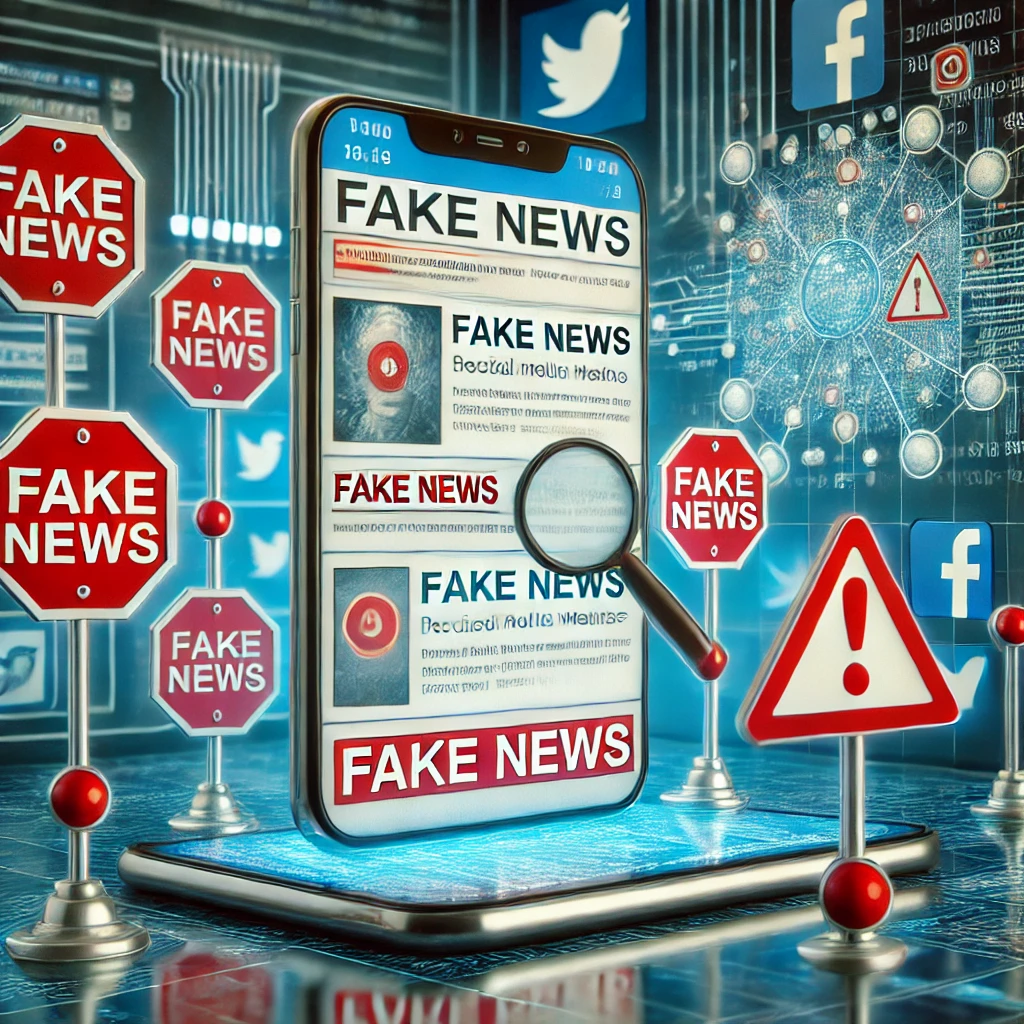

* Imagen generada con IA


### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?
- ¿Qué  se hará?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

En este caso, debido al tipo de clasificación requerida, se propone utilizar una arquitectura basada en **BERT**, realizando un proceso de fine-tuning para ajustarlo a nuestra aplicación específica. El proceso general consistirá en la obtención de los textos, seguido por su tratamiento mediante técnicas de procesamiento de lenguaje, como el uso de embeddings (Word2Vec, FastText, etc.) o el auto-tokenizador propio del modelo. Posteriormente, se entrenará el modelo y se evaluará su desempeño. Inicialmente, se plantea que el producto permita la clasificación de noticias mediante la carga de un archivo de texto en formato .txt para su análisis y clasificación.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

Se hace un diagrama en Trello que permita seguir y modificar las tareas pendiente: https://trello.com/b/2orWf6yM/proyecto-fake-news/timeline



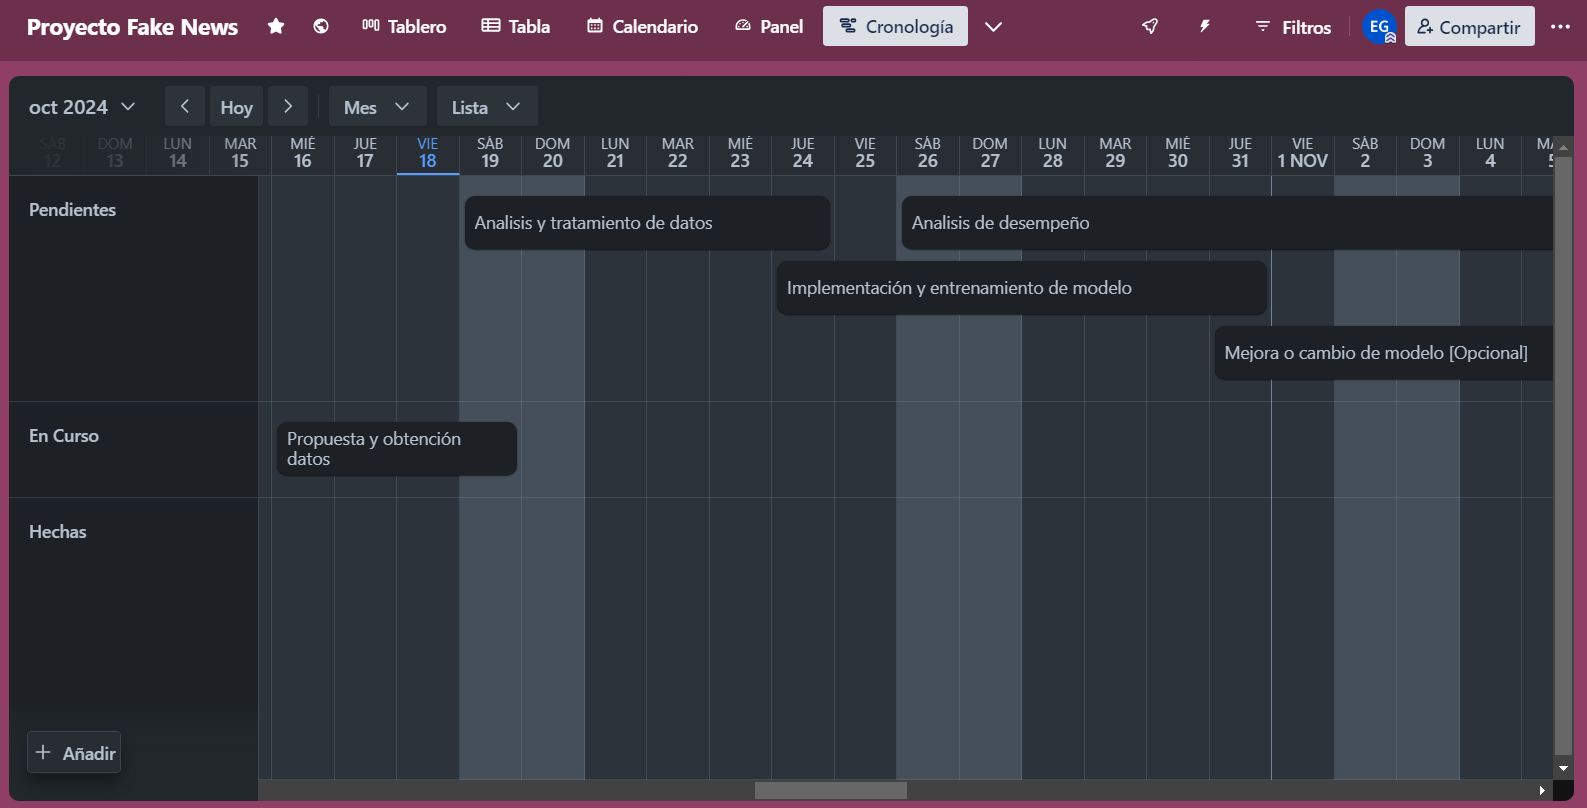


## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

Los datos tomados vienen de un dataset de kaggle que contiene aproximadamente 40000 datos repartidos en dos archivos .csv uno para fake news y otro para noticias reales. Se pueden consultar los datos directamente aqui, se ven 5 columnas, uno con las etiquetas de cada texto, el titulo y el contenido de la noticia, la fecha de publicacion y su el tema de la noticia.

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

### **2.2. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import re, regex


import spacy
from unidecode import unidecode
from gensim.models import FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import CountVectorizer
import polyglot
from polyglot.detect import Detector
from polyglot.detect.base import logger as polyglot_logger
from polyglot.text import Text, Word
polyglot_logger.setLevel("ERROR")


import tensorflow as tf
import keras
import transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [ ]:
pd_true = pd.read_csv("True.csv")
pd_true["label"] = "real"
pd_fake = pd.read_csv("Fake.csv")
pd_fake["label"] = "fake"

In [ ]:
df = pd.concat([pd_true, pd_fake], ignore_index=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


# **Entendimiento y Preparación de los Datos**
---

## **1. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

In [ ]:
num_documents = df.shape[0]
print(f"El corpus tiene {num_documents} documentos.")

El corpus tiene 44898 documentos.


In [ ]:
memory_usage_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"El corpus tiene un tamaño aproximado de {memory_usage_mb:.2f} MB.")

El corpus tiene un tamaño aproximado de 180.75 MB.


### **1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

Con una descripción general sobre las columnas de la tabla se logra identificar que hay **`documentos repetidos`**. Además, se ve que hay observaciones con **`textos vacíos`**.

In [ ]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [ ]:
empty_docs = df["text"].apply(lambda x: re.fullmatch(r'\s*', x) is not None).sum()
print(f"Hay {empty_docs} documentos vacíos en el corpus.")

Hay 631 documentos vacíos en el corpus.


In [ ]:
df = df[df["text"].apply(lambda x: re.fullmatch(r'\s*', x) is None)]

Todas las observaciones se componen por cadenas de caracteres. A continuación, se muestran dos ejemplos de textos pertenecientes al conjunto de datos del estudio.

In [ ]:
df["text"].sample(2, random_state=42).tolist()

['SYDNEY (Reuters) - Ukrainian Justice Minister Pavlo Petrenko said on Thursday he was open to amending law reforms amid concerns they aided corruption and could lead to the end of probes into the shooting of protesters in the run-up up to the 2014 revolution. The eastern European nation, which is in a dispute with Russia over its annexation of Crimea, passed amendments to the Criminal Procedure Code last week that anti-corruption groups say severely limits the time investigators have to solve a crime and present a case in court.  Petrenko said he had yet to go through the final text of the lengthy reforms, but he said that he was aware of the concerns.  If there (are) some positions which make problems for the investigations process for old cases or for new cases I will give proposals to the parliament and president to change these positions,  Petrenko told Reuters in an interview in Sydney, where he was attending a legal industry conference. The legislation still requires the sign-of

In [ ]:
RE_BAD_CHARS = regex.compile(r"[\p{Cc}\p{Cs}]+")

def remove_bad_chars(text):
    return RE_BAD_CHARS.sub("", text)

def detect_lang(text):
  text = Detector(remove_bad_chars(text), quiet=True)
  return text.language.code

In [ ]:
df_c = df.dropna()

print(set([detect_lang(text) for text in df_c.text if len(text) > 10]))

{'zzp', 'en', 'un'}


In [ ]:
df_c = df.dropna()

top = 10
count = 0

for text, status in zip(df_c.text, df_c.label):
  lang = detect_lang(text.lower())
  if len(text) > 10 and not lang in ["en", "UNKNOWN"]:
    print(text, " - lang: " + lang, "- status: " + status)
    if count > top:
      break
    count += 1

Via: GATEWAY PUNDIT  - lang: zzp - status: fake
https://twitter.com/Rosie/status/800939338615824384  - lang: un - status: fake
Via: GATEWAY PUNDIT  - lang: zzp - status: fake
https://twitter.com/Rosie/status/800939338615824384  - lang: un - status: fake


### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar? De ser así, ¿es una variable continua o categórica?
- Analice la distribución de las etiquetas. Identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales? De ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

Con este proyecto se busca clasificar textos de noticias entre dos categorías ("real" y "fake"). Las etiquetas de esta variable corresponden a la columna **`label`**.

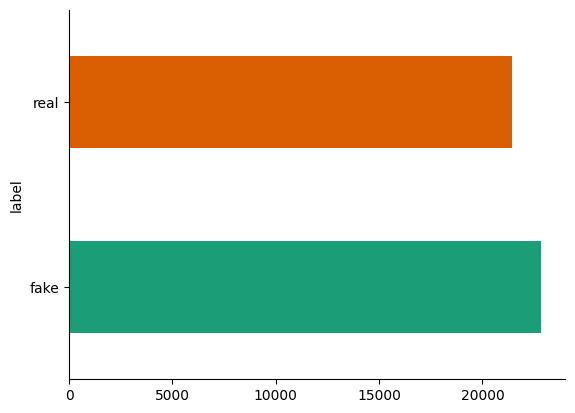

In [ ]:
df.groupby("label").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))
plt.gca().spines[["top", "right",]].set_visible(False)

Se puede ver finalmente la distribución de las etiquetas así como su cantidad. También se evidencia que el conjunto de datos está balanceado.

## **2. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

En este caso al usar texto se sugiere lo siguiente:

- Tokenizacion
- Normalización de textos.
- Limpieza con expresiones regulares.
- Lematización.
- Filtrado de palabras.
- Modificaciones en la grafía.

In [ ]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pat = re.compile(r"[^a-z' ]")
spaces = re.compile(r"\s{2,}")

def remove_patterns(text):
    # Remover links
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remover estilos markdown
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remover arrobas
    text = re.sub(r'@\w+', '', text)

    return text.strip()


def preprocess(text, min_len=1, max_len=23):
    text = remove_patterns(text)
    # Normalizamos el texto
    norm_text = unidecode(text)
    # Quitamos grafía
    lower_text = norm_text.lower()
    # Eliminamos caracteres especiales
    clean_text = re.sub(pat, " ", lower_text)
    # Eliminamos espacios duplicados
    spaces_text = re.sub(spaces, " ", clean_text)
    # Creamos documento de spacy
    doc = nlp(spaces_text.strip())
    # Eliminamos stopwords
    filtered_tokens = filter(lambda token: not token.is_stop, doc)
    # Filtramos palabras por longitud
    filtered_tokens2 = filter(lambda token: len(token) >= min_len and len(token) <= max_len, filtered_tokens)
    # Obtenemos los lemmas de cada token
    lemmas = map(lambda token: token.lemma_, filtered_tokens2)
    lemma_text = " ".join(lemmas)
    return lemma_text

In [ ]:
#Verificar salida de la función
prep_text = preprocess(df.text.iloc[936])
print(df.text.iloc[936])
print(prep_text)

(Reuters) - Modernizing and maintaining the U.S. nuclear arsenal over the next 30 years will cost more than $1.2 trillion, according to a report released on Tuesday by the Congressional Budget Office. The report said current plans for the modernization of the aging planes, ships and missile silos that make up the U.S. nuclear arsenal would cost 50 percent more than if the U.S. only operated and maintained its current equipment in the field. The CBO study reviewed the Obama’s Administration’s plans for modernization of the nuclear arsenal. President Donald Trump in January directed Secretary of Defense James Mattis to conduct his own review the U.S. nuclear forces. The results could be published in the coming months.  U.S. House Armed Services Committee member Adam Smith, a Democrat from Washington, said of the Obama-era plan: “Congress still doesn’t seem to have any answers as to how we will pay for this effort, or what the trade-offs with other national security efforts will be.”  The

In [ ]:
### Aplicamos la función a todo el dataset. Toma más o menos 60 minutos. Después de esto será mejor solamente cargar el dataset preprocesado
prep_text = df.text.apply(preprocess).tolist()
prep_title = df.title.apply(preprocess).tolist()
print(prep_title[:10], prep_text[:10])

['u s budget fight loom republicans flip fiscal script', 'u s military accept transgender recruit monday pentagon', "senior u s republican senator ' let mr mueller job '", 'fbi russia probe help australian diplomat tip nyt', "trump want postal service charge ' ' amazon shipment", 'white house congress prepare talk spend immigration', 'trump say russia probe fair timeline unclear nyt', 'factbox trump twitter dec approval rating amazon', 'trump twitter dec global warming', 'alabama official certify senator elect jones today despite challenge cnn'] ["washington reuter head conservative republican faction u s congress vote month huge expansion national debt pay tax cut call fiscal conservative sunday urge budget restraint keep sharp pivot way republicans u s representative mark meadow speak cbs ' face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issue immigration policy november congre

In [ ]:
df["prep_text"] = prep_text
df["prep_title"] = prep_title
df.head()

,title,text,subject,date,label,prep_text,prep_title
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real,washington reuter head conservative republican...,u s budget fight loom republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real,washington reuter transgender people allow tim...,u s military accept transgender recruit monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real,washington reuter special counsel investigatio...,senior u s republican senator ' let mr mueller...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real,washington reuters trump campaign adviser geor...,fbi russia probe help australian diplomat tip nyt
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real,seattle washington reuters president donald tr...,trump want postal service charge ' ' amazon sh...


In [ ]:
df.drop(columns=["text", "title", "date", "subject"], inplace=True) #Se eliminan las columnas que no son relevantes para el modelo de entrenamiento
df.head()

,label,prep_text,prep_title
0,real,washington reuter head conservative republican...,u s budget fight loom republicans flip fiscal ...
1,real,washington reuter transgender people allow tim...,u s military accept transgender recruit monday...
2,real,washington reuter special counsel investigatio...,senior u s republican senator ' let mr mueller...
3,real,washington reuters trump campaign adviser geor...,fbi russia probe help australian diplomat tip nyt
4,real,seattle washington reuters president donald tr...,trump want postal service charge ' ' amazon sh...


In [ ]:
df.to_csv("PreprocessedFakeNews.csv") # Se guarda el nuevo dataset para ser usado posteriormente

Como vimos se preprocesó todo el texto de manera correcta, se quiso dejar la parte del titulo y el texto separados para si es el caso posteriormente poder utilizar solamente el titulo o solamente el texto para hacer predicciones. Procederemos a mostrar el vocabulario presente en el dataset para entender las ideas principales de este.

In [ ]:
prep_corpus = prep_text + prep_title
vect = (CountVectorizer(max_features=1000, max_df=0.7).fit(prep_corpus))
X = vect.transform(prep_corpus)
X_np = X.toarray()

In [ ]:
vocab = vect.get_feature_names_out()
display(vocab)

array(['able', 'abortion', 'absolutely', 'abuse', 'accept', 'access',
       'accord', 'account', 'accusation', 'accuse', 'act', 'action',
       'activist', 'activity', 'actually', 'ad', 'add', 'address',
       'administration', 'admit', 'adviser', 'advocate', 'affect',
       'afghanistan', 'african', 'agency', 'agenda', 'agent', 'ago',
       'agree', 'agreement', 'ahead', 'aid', 'aide', 'aim', 'air', 'al',
       'allegation', 'allege', 'allow', 'ally', 'ambassador', 'amendment',
       'america', 'american', 'americans', 'announce', 'answer', 'anti',
       'apparently', 'appeal', 'appear', 'approach', 'approve', 'april',
       'arabia', 'area', 'argue', 'arm', 'armed', 'army', 'arrest',
       'article', 'ask', 'assault', 'associate', 'attack', 'attempt',
       'attend', 'attention', 'attorney', 'august', 'authority', 'avoid',
       'away', 'back', 'bad', 'ban', 'bank', 'bar', 'barack', 'base',
       'battle', 'bear', 'begin', 'behavior', 'beijing', 'believe',
       'benefi

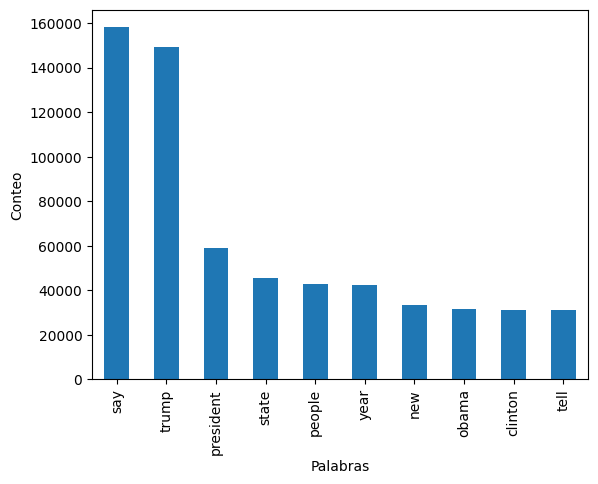

In [ ]:
df_pt = pd.DataFrame(columns=vocab, data=X_np)
df_pt = df_pt.sum()
df_pt = df_pt.sort_values(kind='mergesort', ascending=False).head(10)
fig, ax = plt.subplots()
df_pt.plot(kind="bar")
ax.set_xlabel("Palabras")
ax.set_ylabel("Conteo")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.show()

# **Diseño e Implementación Experimental**
---

## **1. Particion del conjunto de datos**
---

Si el dataset no tiene por defecto definida una partición en conjuntos de entrenamiento y prueba, hágala usted, en las proporciones que considere oportunas.

In [ ]:
df_og = pd.read_csv("PreprocessedFakeNews.csv", index_col=0)
df_og.head()

,label,prep_text,prep_title
0,real,washington reuter head conservative republican...,u s budget fight loom republicans flip fiscal ...
1,real,washington reuter transgender people allow tim...,u s military accept transgender recruit monday...
2,real,washington reuter special counsel investigatio...,senior u s republican senator ' let mr mueller...
3,real,washington reuters trump campaign adviser geor...,fbi russia probe help australian diplomat tip nyt
4,real,seattle washington reuters president donald tr...,trump want postal service charge ' ' amazon sh...


Del conjunto de datos sólo se seleccionan el título y el texto, se combinan en un solo atributo para disminuir la dimensionalidad del problema y finalmente se vectoriza para poder usar estos valores como entrenamiento de la red. Se usará **AutoTokenizer** para transformar estos datos de texto.

In [ ]:
df = pd.DataFrame({"text": df_og["prep_title"] + df_og["prep_text"],
                   "label": df_og["label"]})

df["label"] = df["label"].replace({"real": 0, "fake": 1})
df

<ipython-input-4-2185591c32e6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({"real": 0, "fake": 1})


,text,label
0,u s budget fight loom republicans flip fiscal ...,0
1,u s military accept transgender recruit monday...,0
2,senior u s republican senator ' let mr mueller...,0
3,fbi russia probe help australian diplomat tip ...,0
4,trump want postal service charge ' ' amazon sh...,0
...,...,...
44893,mcpain john mccain furious iran treat sailorst...,1
44894,justice yahoo settle e mail privacy class acti...,1
44895,sunnistan ally ' safe zone ' plan territorial ...,1
44896,blow million al jazeera america finally call q...,1


In [ ]:
df.dropna(inplace=True)
textos = df["text"].tolist()
labels = df["label"].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(textos, labels, test_size=0.2, stratify=labels, random_state=30)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train) # Onehot labels

## **2. Implementación del modelo (DistilBERT)**
---

Implemente los modelos descritos anteriormente usando herramientas de _TensorFlow_. Recuerde que puede aplicar técnicas de aumentación de datos, si es necesario.

Se realiza la tokenización de los conjuntos de entrenamiento y prueba.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors="np")
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors="np")

Ahora se carga el modelo DistilBERT para la clasificación de los textos, por ser menos costoso que un modelo grande como BERT.

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
print(model.summary())

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_39 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Arriba se puede notar que el **`primer bloque`** de la red corresponde al modelo DistilBERT. Los parámetros de ese bloque se **`congelan`** para hacer el **`calentamiento`**. Adicionalmente, se compila el modelo con una taza de aprendizaje de $10^{-3}$ y **`CategoricalCrossentropy`** como función de pérdida.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True))

model.layers[0].trainable = False

Para el entrenamiento, se define un *callback* de tipo **`EarlyStopping`** para detener la ejecución si la función de pérdida en validación no mejora después de cinco epochs.

In [ ]:
stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5,
                                            mode="min", restore_best_weights=True)
history = model.fit(dict(train_encodings), y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.25, callbacks=[stopping])

Epoch 1/10
415/415 [==============================] - 196s 431ms/step - loss: 0.7005 - val_loss: 0.6928
Epoch 2/10
415/415 [==============================] - 177s 426ms/step - loss: 0.6930 - val_loss: 0.6928
Epoch 3/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6930 - val_loss: 0.6927
Epoch 4/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 5/10
415/415 [==============================] - 176s 424ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 6/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6932 - val_loss: 0.6927
Epoch 7/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 8/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 9/10
415/415 [==============================] - 176s 425ms/step - loss: 0.6932 - val_loss: 0.6927
Epoch 10/10
415/415 [==============================] - 176s 424m

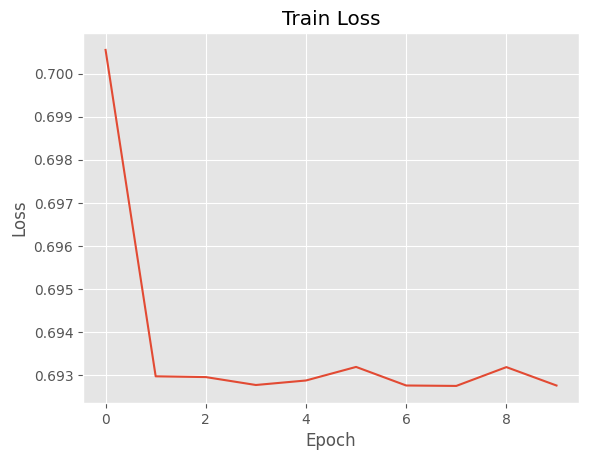

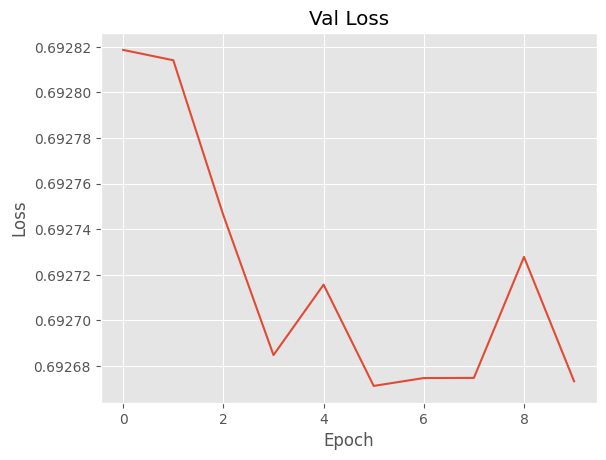

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history["loss"])
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.style.use("ggplot")
plt.plot(history.history["val_loss"])
plt.title("Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

En esta segunda etapa se entrenarán todos los parámetros del modelo a partir de los pesos ya obtenidos con el calentamiento. En este caso, la taza de aprendizaje se reduce a $5 \times 10^{-5}$.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True))

model.layers[0].trainable = True

También se agrega un *callback* de tipo **`Checkpoint`** para guardar los mejores pesos del modelo.

In [ ]:
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="fine_tuning.weights.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")
stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5,
                                            mode="min", restore_best_weights=True)
history = model.fit(dict(train_encodings), y_train,
                    epochs=20, batch_size=64,
                    validation_split=0.25, callbacks=[best_callback, stopping])

Epoch 1/20
414/415 [============================>.] - ETA: 0s - loss: 0.6927
Epoch 1: val_loss improved from inf to 0.69267, saving model to fine_tuning.weights.h5


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


415/415 [==============================] - 91s 204ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 2/20
414/415 [============================>.] - ETA: 0s - loss: 0.6928
Epoch 2: val_loss did not improve from 0.69267
415/415 [==============================] - 81s 196ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/20
414/415 [============================>.] - ETA: 0s - loss: 0.6927
Epoch 3: val_loss improved from 0.69267 to 0.69267, saving model to fine_tuning.weights.h5
415/415 [==============================] - 82s 198ms/step - loss: 0.6926 - val_loss: 0.6927
Epoch 4/20
414/415 [============================>.] - ETA: 0s - loss: 0.6927
Epoch 4: val_loss did not improve from 0.69267
415/415 [==============================] - 82s 196ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 5/20
414/415 [============================>.] - ETA: 0s - loss: 0.6927
Epoch 5: val_loss did not improve from 0.69267
415/415 [==============================] - 82s 197ms/step - loss: 0.6927 - val_loss: 0.6927


In [ ]:
predictions = model.predict(dict(test_encodings))
predictions = tf.math.softmax(predictions.logits)

print(classification_report(y_test, np.argmax(predictions, axis=-1)))

277/277 [==============================] - 21s 68ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4283
           1       0.52      1.00      0.68      4554

    accuracy                           0.52      8837
   macro avg       0.26      0.50      0.34      8837
weighted avg       0.27      0.52      0.35      8837



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finalmente, se obtuvo un valor de $52\%$ para el *accuracy*.

Por el valor de *recall* de $1$, se entiende que **`no hay falsos negativos`**, o sea que todas las noticias falsas se están clasificando bien. Sin embargo, que la precisión sea de $0.52$ significa que hay casi tantos falsos positivos como verdaderos positivos. Esto es un problema porque indica que casi todas las observaciones se están clasificando como **`noticias falsas`**.

Según lo anterior, hace falta buscar otros modelos diferentes que se ajusten mejor al problema tratado, o entrenar más epochs del mismo modelo o variando sus hiperparámetros.

## **3. Entrenamiento de LSTM y selección de hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo. Recuerde que tiene diversas erramientas para hacer validación.

Dado que el entrenamiento del transformer no fue satisfactorio se procedera a implementar un modelo un poco más simple y clásico en el tratamiento de lenguaje natural, usaremos un LSTM para clasificacion de texto, junto con un tokenizador clásico proporcionado por la libreria de TensorFlow.

In [ ]:
## Se usa la misma divison Test, train anterior

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
v = len(word_idx)
print("the size of vocab =", v)
train_encodings2 = tokenizer.texts_to_sequences(X_train)
test_encodings2 = tokenizer.texts_to_sequences(X_test)

the size of vocab = 104551


En este caso se usara un truncamiento de las secuencias dependiendo de su longitud, se fijó en 150 pues se vio que era un buen parametro para esta aplicación pues admite una longitud correcta que permite tener un modelo computacional no muy grande y a la vez no perder información. Esto es crucial en modelos de deep learning para procesamiento de lenguaje natural (NLP), especialmente cuando se usan redes neuronales recurrentes (RNNs), como LSTM.

In [ ]:
maxlen = 150
train_encodings2 = pad_sequences(train_encodings2, maxlen=maxlen)
test_encodings2 = pad_sequences(test_encodings2, maxlen=maxlen)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

De manera general el modelo se separa en una capa de embedding, un extractor de caracteristicas y un clasificador de estas. Podemos ver como la capa de embedding es necesaria para transformar los indices extraidos en el Tokenizador en vectores densos que puedan representar más información semantica, posteriormente estos vectores son usados en la capa LSTM par capturar relaciones de dependencia entre estos y finalmente se utiliza una capa intermedia de MaxPooling y una capa densa para disminuir la dimensionalidad de las caracteristicas, teniendo como salida una capa de clasificación densa de 2 neuronas.

In [ ]:
inputt = Input(shape=(maxlen,))
learning_rate = 0.0001
x = Embedding(v + 1, 100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(2, activation="softmax")(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

LabelEncoder es una clase que asigna un valor numérico único a cada etiqueta en los datos, es importante usar esta clase ya que los modelos requieren que las etiquetas sean numéricas para comprender y clasificar los datos. Se hace para garantizar que los labels obtenidos sean tratados como cifras y no caracteres alfanumericos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train_encoded) # Onehot labels

In [ ]:
history_LSTM = model.fit(train_encodings2, y_train_encoded, batch_size=128, epochs=15, validation_split=0.25)

Epoch 1/15
208/208 [==============================] - 33s 157ms/step - loss: 0.2169 - accuracy: 0.9246 - val_loss: 0.1761 - val_accuracy: 0.9606
Epoch 2/15
208/208 [==============================] - 19s 89ms/step - loss: 0.1016 - accuracy: 0.9712 - val_loss: 0.1099 - val_accuracy: 0.9689
Epoch 3/15
208/208 [==============================] - 13s 60ms/step - loss: 0.0595 - accuracy: 0.9848 - val_loss: 0.0956 - val_accuracy: 0.9741
Epoch 4/15
208/208 [==============================] - 9s 43ms/step - loss: 0.0370 - accuracy: 0.9902 - val_loss: 0.1058 - val_accuracy: 0.9744
Epoch 5/15
208/208 [==============================] - 9s 42ms/step - loss: 0.0291 - accuracy: 0.9935 - val_loss: 0.0893 - val_accuracy: 0.9770
Epoch 6/15
208/208 [==============================] - 7s 32ms/step - loss: 0.0207 - accuracy: 0.9948 - val_loss: 0.0757 - val_accuracy: 0.9783
Epoch 7/15
208/208 [==============================] - 5s 24ms/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.0726 - val_accuracy: 0.

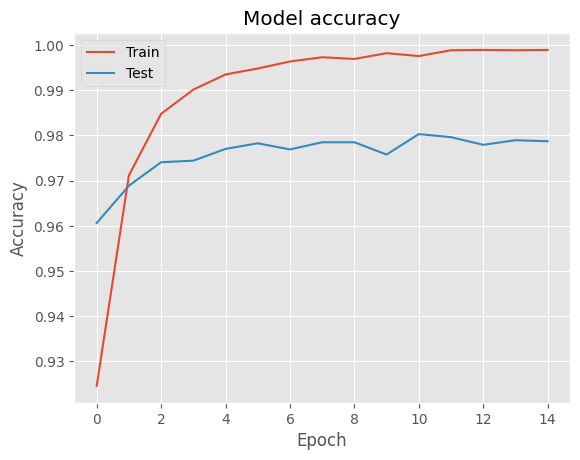

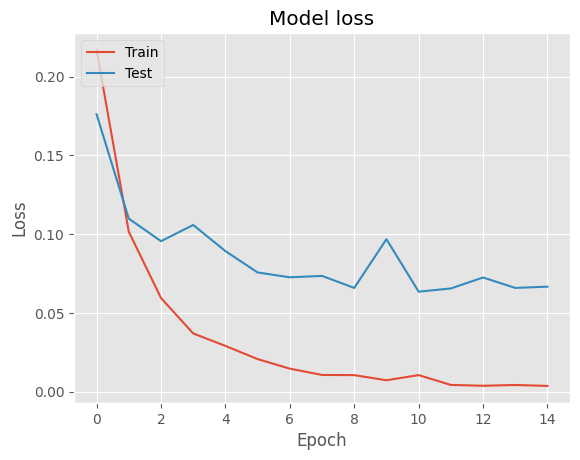

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_LSTM.history["accuracy"])
plt.plot(history_LSTM.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history_LSTM.history["loss"])
plt.plot(history_LSTM.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

Como acabamos de ver el entrenamiento fue muy satisfactorio sobre el dataset de entrenamiento y validación. Obteniendo como resultado:

**loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0667 - val_accuracy: 0.9787**

Lo que nos entrega un modelo muy bueno para clasificación de texto.
Veremos como se comporta en un dataset de test que no ha sido visto por el modelo.

277/277 [==============================] - 1s 4ms/step


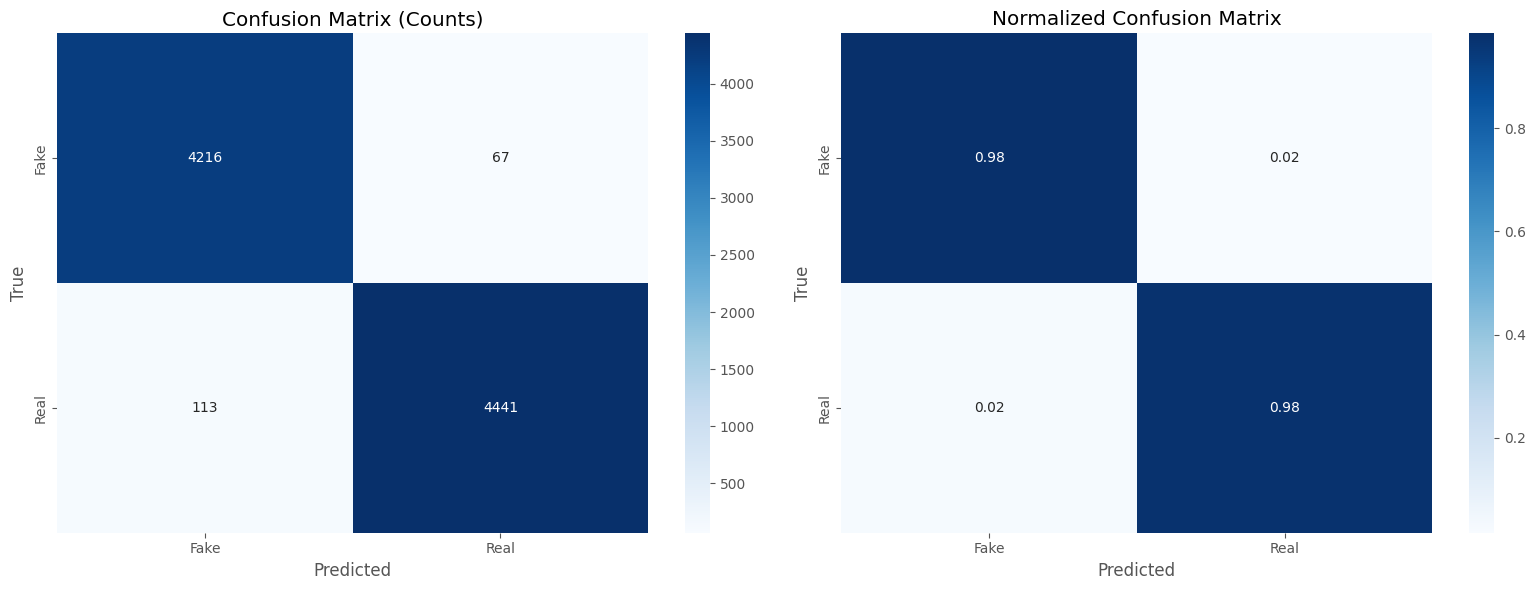

In [ ]:
y_pred_probs = model.predict(test_encodings2)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_test_encoded = tf.keras.utils.to_categorical(y_test_encoded)
y_true_labels = np.argmax(y_test_encoded, axis=1)

# Calculo de matriz de confusión y matriz de confusión normalizada
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
conf_matrix_normalized = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

# Creación del subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión tradicional
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'], ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Matriz de confusión normalizada
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'], ax=axes[1])
axes[1].set_title('Normalized Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

Como se ve obtenemos resultados muy eficientes donde en general el modelo para la clasificación de textos funciona muy bien con una precisión (accuracy) del **98%**

## **Créditos**

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*